(torch.Size([1000, 2]), torch.Size([1000]))

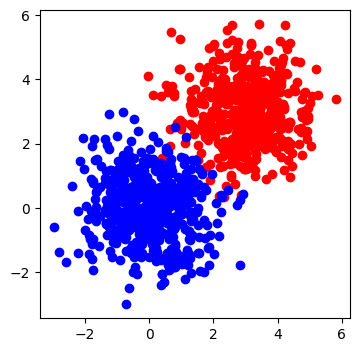

In [1]:
# trying to make a binary classifier

import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline
red = torch.randn((500,2)) + 3
blue = torch.randn((500,2))
plt.figure(figsize = (4,4))
plt.scatter(red[:,0],red[:,1],c="red")
plt.scatter(blue[:,0],blue[:,1],c="blue")

inp = torch.cat((red,blue))
out = torch.cat((torch.ones(500),torch.zeros(500))).long()
                  
W = torch.randn((2,2),requires_grad = True)
b = torch.randn((2,),requires_grad = True)

inp.shape , out.shape

In [325]:
lr = .1
for _ in range(10):
    logits = inp @ W + b
    loss = F.cross_entropy(logits,out)
    print(f'loss = {loss}')
    W.grad = None
    b.grad = None
    loss.backward()
    W.data += -lr * W.grad
    b.data += -lr * b.grad

loss = 0.029083702713251114
loss = 0.029083671048283577
loss = 0.02908364124596119
loss = 0.029083605855703354
loss = 0.029083572328090668
loss = 0.02908354252576828
loss = 0.029083510860800743
loss = 0.029083479195833206
loss = 0.02908344753086567
loss = 0.029083415865898132


prob of being red : 0.9841955900192261
prob of being red : 0.9966748952865601
prob of being red : 0.9480037093162537
prob of being red : 0.9994139671325684
prob of being red : 0.9992015957832336
prob of being red : 0.9985876083374023
prob of being red : 0.9945479035377502
prob of being red : 0.9989219903945923
prob of being red : 0.9921116828918457
prob of being red : 0.9851099252700806
prob of being red : 0.9866356253623962
prob of being red : 0.9866026639938354
prob of being red : 0.9962867498397827
prob of being red : 0.967128336429596
prob of being red : 0.9881381392478943
prob of being red : 0.9969162940979004
prob of being red : 0.9967856407165527
prob of being red : 0.9961787462234497
prob of being red : 0.9975040555000305
prob of being red : 0.9860146045684814
prob of being red : 0.9947952628135681
prob of being red : 0.9940946698188782
prob of being red : 0.9880099892616272
prob of being red : 0.9841485023498535
prob of being red : 0.9981215596199036
prob of being red : 0.9992

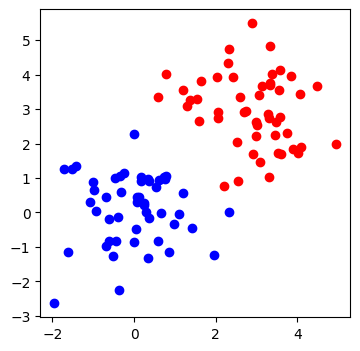

In [3]:
red = torch.randn((50,2)) + 3
plt.figure(figsize =(4,4))
plt.scatter(red[:,0],red[:,1],c="red")
logits = red @ W
prob = F.softmax(logits,dim=1)

for i in range(len(red)): 
    print(f'prob of being red : {prob[i][1]}')
    
blue = torch.randn((50,2))
plt.scatter(blue[:,0],blue[:,1],c="blue")
logits = blue @ W
prob = F.softmax(logits,dim=1)

for i in range(len(blue)): 
    print(f'prob of being blue : {prob[i][0]}')